# Analítica Avanzada de Datos. - Práctica 1
---

Ahora es tu turno de analizar un banco de datos del mundo real que contiene datos de vuelos del Departamento de Transporte de Estados Unidos

Primero carga y visualiza los datos. (flights.csv)

In [1]:
!pip install distfit==1.6.10

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 KB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 104.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 KB 36.2 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors
import seaborn as sns
from distfit import distfit

In [3]:
df = pd.read_csv("./flights.csv")

In [4]:
df.head(5)

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


El banco de datos contiene observaciones de los vuelos nacionales estadounidenses en 2013 y consta de los siguientes campos:
- **Año**: El año del vuelo (todos los registros son de 2013).
- **Mes**: El mes del vuelo
- **DayofMonth** (día del mes): El día del mes en el que salió el vuelo
- **Día de la semana**: El día de la semana en que salió el vuelo - del 1 (lunes) al 7 (domingo)
- **Compañía aérea**: La abreviatura de dos letras de la compañía aérea.
- **OriginAirportID**: Identificador numérico único del aeropuerto de salida.
- **OriginAirportName**: El nombre completo del aeropuerto de salida
- **OriginCity** (Ciudad de origen): Ciudad del aeropuerto de salida
- **OriginState**: Estado del aeropuerto de salida Estado del aeropuerto de salida
- **DestAirportID**: Identificador numérico único del aeropuerto de destino
- **DestAirportName**: El nombre completo del aeropuerto de destino
- **DestCity**: La ciudad del aeropuerto de destino
- **DestState**: El estado del aeropuerto de destino
- **CRSDepTime**: La hora de salida programada
- **DepDelay**: El número de minutos que se retrasó la salida (los vuelos que salieron antes de lo previsto tienen un valor negativo)
- **DelDelay15**: Un indicador binario de que la salida se retrasó más de 15 minutos (y por lo tanto se considera "tarde")
- **CRSArrTime**: La hora de llegada programada
- **ArrDelay**: El número de minutos que se retrasó la llegada

Lo que se tiene que hacer en esta práctica es explorar los datos de vuelo para analizar los posibles factores que afectan a los retrasos en la salida o llegada de un vuelo.

 1. Empieza con limpiar los datos.
     - Identifica los datos nulos o ausentes e imputa los valores de sustitución adecuados.
     - Identifica y elimina cualquier valor atípico en las columnas *DepDelay* y *ArrDelay*.
             - Tips: 
            - Primero visualiza la distribución de las columnas
            - Define donde se observan los valores atipicos 
            - Recorta los datos de tal forma que los percentiles esten entre 1 y 90
 2. Explora los datos limpios.
     - Consulta las estadísticas de resumen de los campos numéricos del conjunto de datos.
     - Determina la distribución de las columnas *DepDelay* y *ArrDelay*.
     - Utiliza estadísticas, funciones de agregación y visualización para responder a las siguientes preguntas:
         - *¿Cuáles son los promedios (mean) de salida y llegada?*
         - *¿Cómo se comparan las compañías en cuanto a retrasos en las llegadas?*
         - *¿Hay días de la semana más propensos a las llegadas que otros?*
         - *¿Cuál es el aeropuerto de salida con mayor retraso medio?*
         - *¿Las salidas tardías suelen provocar mayores retrasos en las llegadas que las salidas puntuales?*
         - *¿Qué ruta (del aeropuerto de origen al aeropuerto de destino) tiene más llegadas con retraso?*
         - *¿Qué ruta tiene el mayor retraso medio de llegada?*

### 1. Limpieza de datos 

#### Identificar los datos nulos o ausentes e imputa los valores de sustitución adecuados.

In [5]:
# Identifica los valores nulos
print(df.isnull().sum())

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64


In [6]:
# Obtenemos los índices de los valores nulos
index_nans_depdel15 = df[df['DepDel15'].isnull() == True].index.values
len(index_nans_depdel15)

2761

In [7]:
for index in index_nans_depdel15:
    if int(df.loc[index, ['DepDelay']]) <= 15:
        df.loc[index, ['DepDel15']] = 0
    else:
        df.loc[index, ['DepDel15']] = 1

In [8]:
df.loc[index_nans_depdel15, ['DepDelay', 'DepDel15']].head(5)

,DepDelay,DepDel15
171,0,0.0
359,0,0.0
429,0,0.0
545,0,0.0
554,0,0.0


In [9]:
# Identifica los valores nulos
print(df.isnull().sum())

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64


#### Identifica y elimina cualquier valor atípico en las columnas DepDelay y ArrDelay.

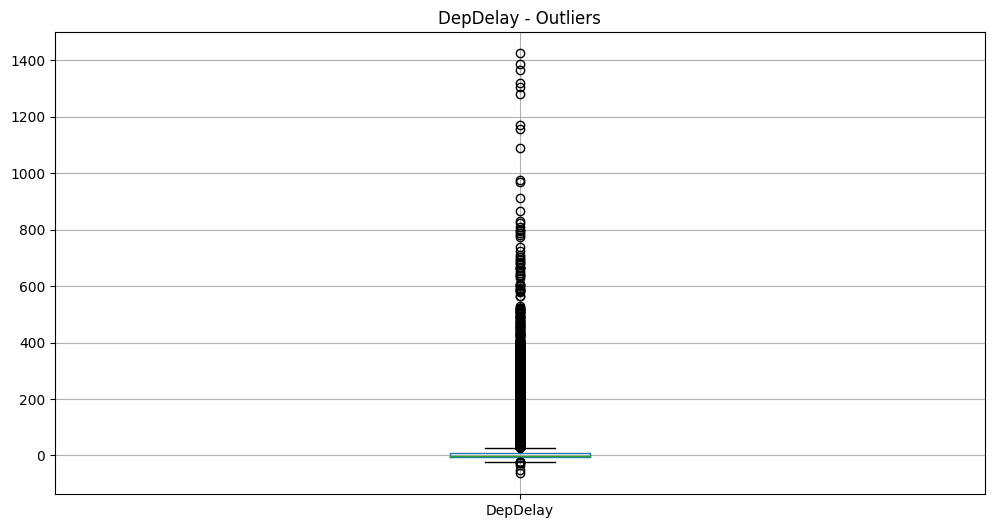

Cuartiles: [-4. -1.  9.]
Limite inferior externo:  -43.0
Limite inferior interno:  -23.5
Limite superior interno:  28.5
Limite superior externo:  48.0
Outliers moderados:  [35, 40, 47, 29, 43, 32, 34, 45, 29, 34, 41, 33, 37, 35, 32, 31, 29, 38, 34, 32, 30, 30, 40, 34, 46, 29, 43, 42, 29, 45, 43, 44, 29, 34, 42, 36, 42, 30, 30, 32, 37, 31, 32, 42, 41, 42, 34, 36, 35, 47, 39, 33, 45, 34, 32, 41, 31, 45, 29, 30, 40, 32, 32, 40, 45, 40, 32, 29, 34, 33, 43, 35, 43, 29, 41, 30, 33, 34, 34, 44, 43, 30, 44, 34, 36, 33, 36, 35, 44, 33, 43, 30, 30, 43, 37, 39, 35, 30, 33, 35, 29, 47, 33, 35, 41, 42, 38, 29, 29, 47, 46, 35, 36, 37, 30, 37, 32, 46, 43, 38, 44, 39, 44, 38, 29, 46, 31, 35, 32, 31, 37, 44, 38, 32, 42, 42, 31, 32, 42, 29, 36, 34, 47, 34, 39, 46, 32, 33, 43, 42, 46, 39, 43, 45, 39, 35, 33, 32, 31, 29, 29, 41, 40, 44, 31, 36, 47, 37, 36, 29, 35, 31, 47, 44, 39, 32, 34, 35, 35, 39, 42, 35, 32, 44, 32, 29, 34, 31, 29, 34, 30, 37, 33, 43, 35, 44, 29, 38, 29, 36, 34, 30, 42, 39, 36, 33, 33,

In [10]:
# Solucionar los outliers de la columna DepDelay
df['DepDelay'].plot(kind='box', title='DepDelay - Outliers', figsize=(12,6), grid=True)
plt.show()

# Para saber los cuartiles. La funcion recibe como parametro una serie de pandas
cuartiles = df['DepDelay'].quantile([0.25, 0.5, 0.75])
cuartiles = np.array(cuartiles)
# print(type(cuartiles)) #Serie de pandas
print("Cuartiles:", cuartiles)

# Convertimos la columna en un array para hacer los calculos de cuartiles y percentiles
DepDelay = np.array(df['DepDelay'])

# Conocer cuáles son los valores outliers ligeros y cuáles son extremos
mediana = cuartiles[1]
IQ = cuartiles[-1]-cuartiles[0]
# print(IQ)
lif = cuartiles[0]-(1.5*IQ)
uif = cuartiles[2]+(1.5*IQ)
lof = cuartiles[0]-(3.0*IQ)
uof = cuartiles[2]+(3.0*IQ)
print("Limite inferior externo: ", lof)
print("Limite inferior interno: ", lif)
print("Limite superior interno: ", uif)
print("Limite superior externo: ", uof)


# Conocer los outliers
outliersModerados = []
outliersExtremos = []
for dato in df['DepDelay'].values:
    if (dato<lif and dato>lof) or (dato>uif and dato<uof):
        outliersModerados.append(dato)
    if(dato<lof) or (dato>uof):
        outliersExtremos.append(dato)

print("Outliers moderados: ", outliersModerados)
print("Outliers extremos: ", outliersExtremos)

indicePercetiles = np.array([10,20,30,40,50,60,70,80,90])
percentiles = np.percentile(DepDelay,indicePercetiles)
print("Percentiles: ", percentiles)

# Se reemplazan los outliers por el 10 percentil o el 90 percentil
# en funcion si el outiler es inferior o superior, respectivamente
df.loc[df['DepDelay'] < lif, 'DepDelay'] = percentiles[0]
df.loc[df['DepDelay'] > uif, 'DepDelay'] = percentiles[-1]

# Se verifica que ya no existan outliers
outliersModerados = []
outliersExtremos = []
for dato in df['DepDelay'].values:
    if (dato<lif and dato>lof) or (dato>uif and dato<uof):
        outliersModerados.append(dato)
    if(dato<lof) or (dato>uof):
        outliersExtremos.append(dato)

print("Outliers moderados: ", outliersModerados)
print("Outliers extremos: ", outliersExtremos)


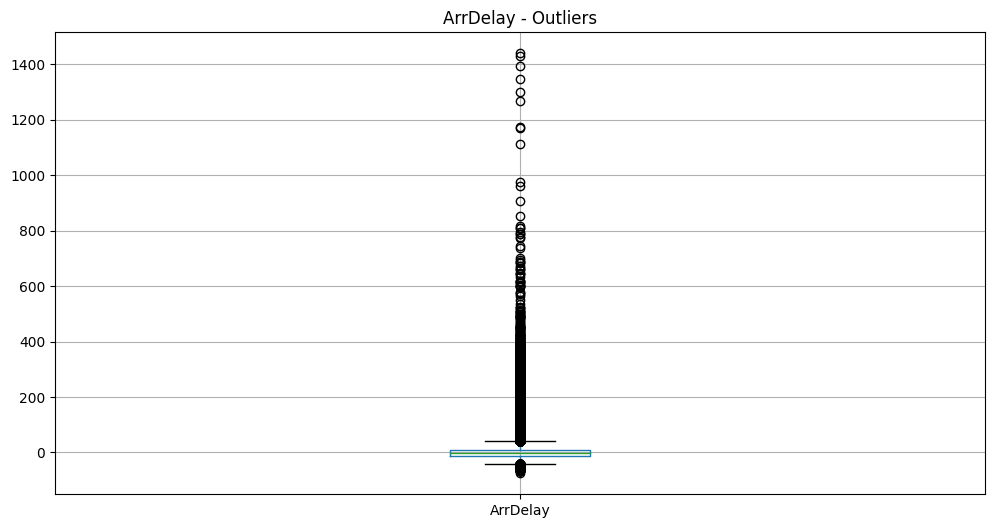

Cuartiles: [-11.  -3.  10.]
Limite inferior externo:  -74.0
Limite inferior interno:  -42.5
Limite superior interno:  41.5
Limite superior externo:  73.0
Outliers moderados:  [54, 44, 46, 72, 42, 48, 43, 42, 53, 52, 60, 59, 56, 43, 44, 46, 52, 42, 47, 69, 46, 45, 48, 55, 67, 45, 48, 66, 65, 52, 72, 44, 69, 58, 49, 60, -45, 46, 60, 59, 56, 49, 56, 51, 42, 46, 58, -44, 50, 43, 72, 47, -51, 52, 47, 68, 54, 47, 52, 43, 58, 42, 46, 46, 65, 64, 50, -48, 64, 48, 44, -49, 42, 52, 59, 53, 49, 51, 43, 69, 47, 44, 52, -49, 59, 45, 64, 42, 42, 42, 45, -45, 63, 45, 43, 55, 64, 59, 42, 51, 42, 47, 69, 49, -46, 49, 50, 50, 66, -47, 59, 46, 48, 49, 68, 42, 42, 60, 64, 56, 67, 52, 71, 50, 47, 46, 47, 42, 42, 61, 48, 67, 46, 56, 72, 71, 54, 62, 66, 60, 52, 47, 58, -46, 50, 54, 47, 51, 45, 50, 47, 44, 55, 46, 58, 53, 47, -44, -62, 49, 67, 51, 63, 55, 42, 60, 44, 56, 46, 58, 66, 67, -48, -46, 70, 50, 64, 52, 44, 46, 53, 43, 53, -51, 71, 67, 63, 55, 52, 68, 60, 63, 60, 70, 64, 51, 67, 44, 55, 47, 43, 46, 4

In [11]:
# Solucionar los outliers de la columna ArrDelay
df['ArrDelay'].plot(kind='box', title='ArrDelay - Outliers', figsize=(12,6), grid=True)
plt.show()

# Para saber los cuartiles. La funcion recibe como parametro una serie de pandas
cuartiles = df['ArrDelay'].quantile([0.25, 0.5, 0.75])
cuartiles = np.array(cuartiles)
# print(type(cuartiles)) #Serie de pandas
print("Cuartiles:", cuartiles)

ArrDelay = np.array(df['ArrDelay'])

# Conocer cuáles son los valores outliers ligeros y cuáles son extremos
mediana = cuartiles[1]
IQ = cuartiles[-1]-cuartiles[0]
# print(IQ)
lif = cuartiles[0]-(1.5*IQ)
uif = cuartiles[2]+(1.5*IQ)
lof = cuartiles[0]-(3.0*IQ)
uof = cuartiles[2]+(3.0*IQ)
print("Limite inferior externo: ", lof)
print("Limite inferior interno: ", lif)
print("Limite superior interno: ", uif)
print("Limite superior externo: ", uof)

# Conocer los outliers
outliersModerados = []
outliersExtremos = []
for dato in df['ArrDelay'].values:
    if (dato<lif and dato>lof) or (dato>uif and dato<uof):
        outliersModerados.append(dato)
    if(dato<lof) or (dato>uof):
        outliersExtremos.append(dato)

print("Outliers moderados: ", outliersModerados)
print("Outliers extremos: ", outliersExtremos)

indicePercetiles = np.array([10,20,30,40,50,60,70,80,90])
percentiles = np.percentile(ArrDelay,indicePercetiles)
print("Percentiles: ", percentiles)

# Reemplazamos los outliers extremos por el percentil 10 y el percentil 90
# en funcion de que tengamos un outlier inferior o superior, respectivamente
df.loc[df['ArrDelay'] < lif, 'ArrDelay'] = percentiles[0]
df.loc[df['ArrDelay'] > uif, 'ArrDelay'] = percentiles[-1]


# Se verifica que ya no existan outliers
outliersModerados = []
outliersExtremos = []
for dato in df['ArrDelay'].values:
    if (dato<lif and dato>lof) or (dato>uif and dato<uof):
        outliersModerados.append(dato)
    if(dato<lof) or (dato>uof):
        outliersExtremos.append(dato)

print("Outliers moderados: ", outliersModerados)
print("Outliers extremos: ", outliersExtremos)


### 2. Explora los datos limpios


#### Consulta las estadísticas de resumen de los campos numéricos del conjunto de datos.

In [12]:
df_1 = _deepnote_execute_sql('SELECT *\nFROM \'flights.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_1

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271935,2013,9,20,5,VX,13204,Orlando International,Orlando,FL,12892,Los Angeles International,Los Angeles,CA,1730,1,0.0,1945,18,1,0
271936,2013,4,19,5,FL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,11697,Fort Lauderdale-Hollywood International,Fort Lauderdale,FL,1020,24,1.0,1218,61,1,0
271937,2013,10,26,6,WN,12191,William P Hobby,Houston,TX,10821,Baltimore/Washington International Thurgood Ma...,Baltimore,MD,1540,30,1.0,1935,15,1,0
271938,2013,5,7,2,HA,13830,Kahului Airport,Kahului,HI,12173,Honolulu International,Honolulu,HI,609,-5,0.0,641,-6,0,0


In [13]:
df.drop(["Year", "Month", "DayofMonth", "DayOfWeek", "OriginAirportID", "DestAirportID", "ArrDel15", "Cancelled"], axis = 1).describe()

,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay
count,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000
mean,1325.498713,5.030885,0.199092,1505.477819,1.110936
std,470.748546,14.281637,0.399318,493.204020,18.057694
min,1.000000,-23.000000,0.000000,1.000000,-42.000000
25%,920.000000,-4.000000,0.000000,1119.000000,-11.000000
50%,1320.000000,-1.000000,0.000000,1529.000000,-3.000000
75%,1725.000000,9.000000,0.000000,1918.000000,10.000000
max,2359.000000,37.000000,1.000000,2359.000000,41.000000


#### Determina la distribución de las columnas DepDelay y ArrDelay.

(array([   128.,   2742.,  41943., 115356.,  34712.,  18305.,  12233.,
          8261.,   4210.,  34050.]),
 array([-23., -17., -11.,  -5.,   1.,   7.,  13.,  19.,  25.,  31.,  37.]),
 <BarContainer object of 10 artists>)

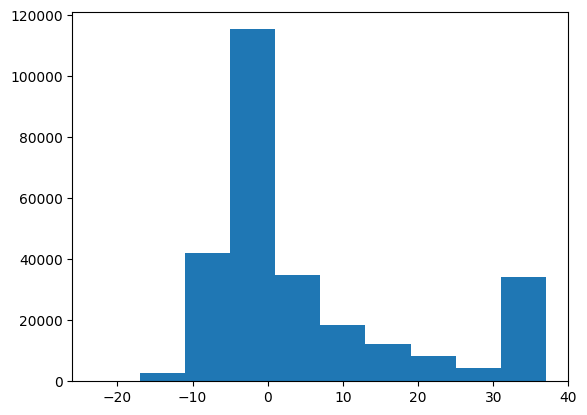

In [14]:
plt.hist(df["DepDelay"])

(array([ 1860.,  6512., 22697., 59137., 61920., 43565., 24683., 12427.,
         8335., 30804.]),
 array([-42. , -33.7, -25.4, -17.1,  -8.8,  -0.5,   7.8,  16.1,  24.4,
         32.7,  41. ]),
 <BarContainer object of 10 artists>)

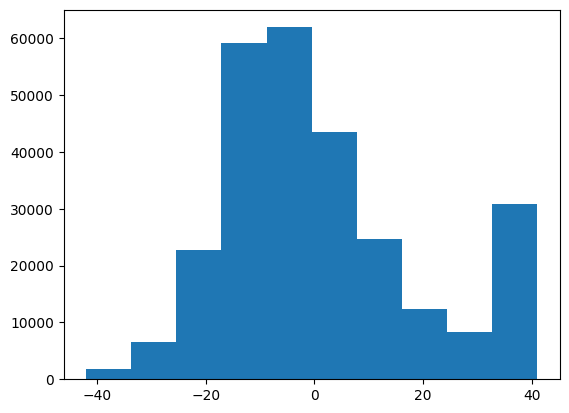

In [15]:
plt.hist(df["ArrDelay"])

Determina la distribución de las columnas *DepDelay* y *ArrDelay*.

Columna DepDelay

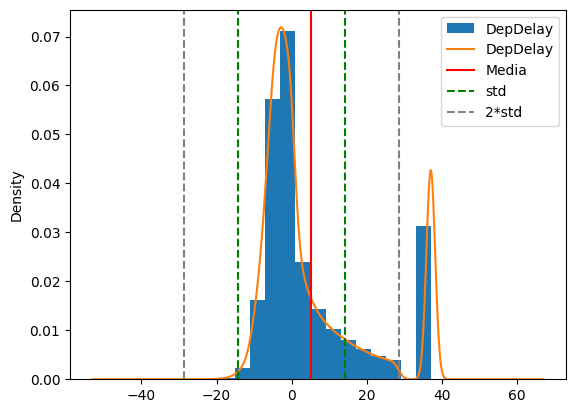

In [16]:
# Histograma
media_DepDelay = np.mean(df["DepDelay"].values) 
std_DepDelay = np.std(df["DepDelay"].values)

df["DepDelay"].plot(kind = "hist", density = True, bins=15) # change density to true, because KDE uses density
df["DepDelay"].plot(kind = "kde")
plt.axvline(x = media_DepDelay, color = 'r', linestyle = '-', label = "Media")
plt.axvline(x = std_DepDelay, color = 'g', linestyle = '--', label = "std")
plt.axvline(x = -1*std_DepDelay, color = 'g', linestyle = '--')
plt.axvline(x = 2*std_DepDelay, color = 'gray', linestyle = '--', label = "2*std")
plt.axvline(x = -2*std_DepDelay, color = 'gray', linestyle = '--')
plt.legend()
plt.show()

In [17]:
# Determinar la distribucion de las columnas
# Initialize distfit
dist = distfit()

# Determine best-fitting probability distribution for data
dist.fit_transform(df["DepDelay"].values)

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.292355] [loc=5.031 scale=14.282]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.317078] [loc=-23.000 scale=28.031]
[distfit] >INFO> [pareto    ] [0.10 sec] [RSS: 0.317078] [loc=-2147483671.000 scale=2147483648.000]
[distfit] >INFO> [dweibull  ] [2.51 sec] [RSS: 0.286181] [loc=3.200 scale=11.111]
[distfit] >INFO> [t         ] [6.90 sec] [RSS: 0.251291] [loc=-1.873 scale=4.443]
[distfit] >INFO> [genextreme] [10.3 sec] [RSS: 0.259102] [loc=-2.011 scale=7.759]
[distfit] >INFO> [gamma     ] [2.05 sec] [RSS: 0.275428] [loc=-22.006 scale=5.976]
[distfit] >INFO> [lognorm   ] [2.64 sec] [RSS: 0.268599] [loc=-23.057 scale=25.263]
[distfit] >INFO> [beta      ] [6.43 sec] [RSS: 0.322864] [loc=-23.708 scale=60.708]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.303968] [loc=-23.000 scale=60.000]
[distfit] >INFO> [loggamma  ] [1.21 sec] [RSS: 0.293032] [loc=-4243.179 scale=579.046]
[distfit] >INFO> C

{'model': {'name': 't',
  'score': 0.25129084820418435,
  'loc': -1.8732447894159319,
  'scale': 4.442577329676871,
  'arg': (1.091270785165849,),
  'params': (1.091270785165849, -1.8732447894159319, 4.442577329676871),
  'model': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7fb02a23c340>,
  'bootstrap_score': 0,
  'bootstrap_pass': None,
  'color': '#e41a1c',
  'CII_min_alpha': -26.259660400871095,
  'CII_max_alpha': 22.513170822039214},
 'summary':           name     score           loc         scale  \
 0            t  0.251291     -1.873245      4.442577   
 1   genextreme  0.259102     -2.010988      7.758515   
 2      lognorm  0.268599    -23.056932     25.262695   
 3        gamma  0.275428    -22.006115      5.975589   
 4     dweibull  0.286181      3.200153     11.111432   
 5         norm  0.292355      5.030885     14.281611   
 6     loggamma  0.293032  -4243.179177    579.046283   
 7      uniform  0.303968         -23.0          60.0   
 8       pareto  

[distfit] >INFO> Create pdf plot for the parametric method.
[distfit] >INFO> Estimated distribution: T(loc:-1.873245, scale:4.442577)
La distribución más adecuada para 'DepDelay es:  t
Parametros: (1.091270785165849, -1.8732447894159319, 4.442577329676871)
Score del modelo:  0.25129084820418435


(<Figure size 2000x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '\nt(df=1.09127, loc=-1.87324, scale=4.44258)'}, xlabel='Values', ylabel='Frequency'>)

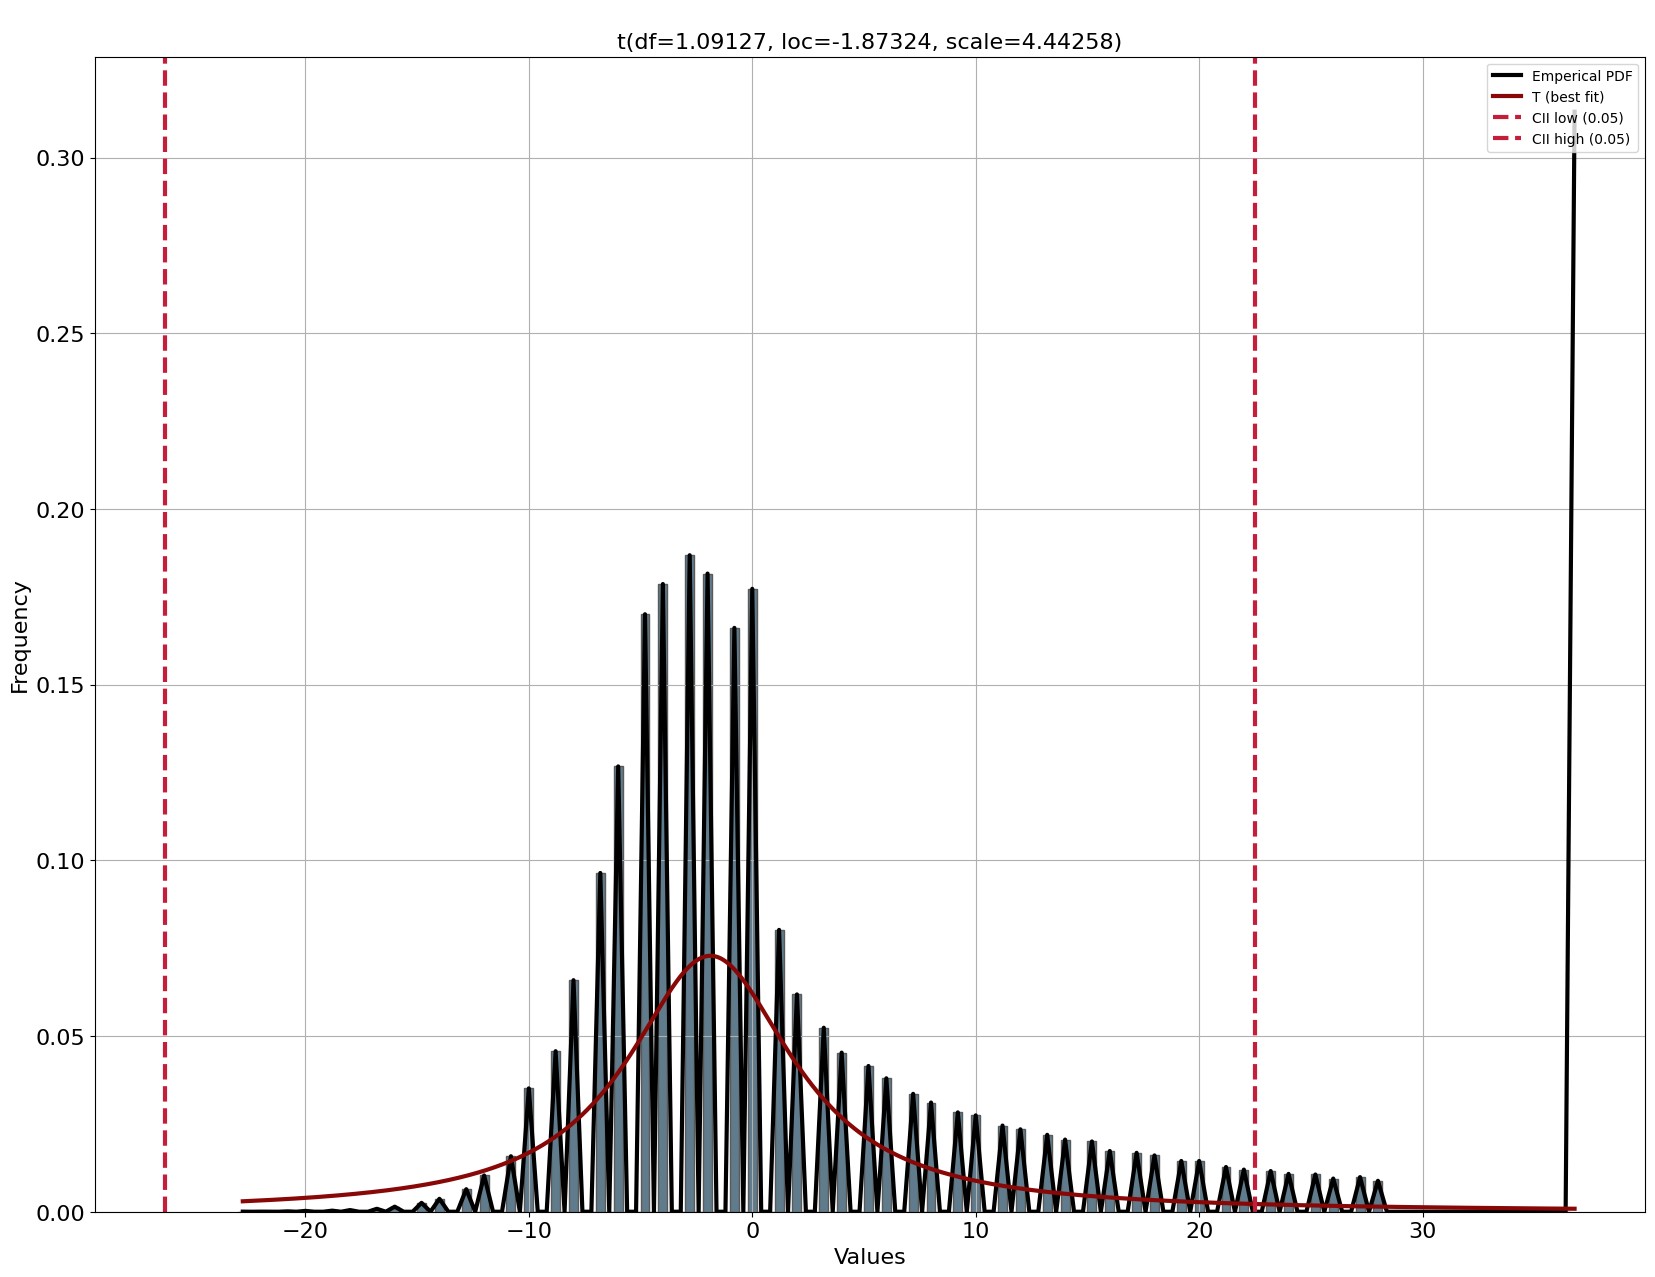

In [18]:
print("La distribución más adecuada para 'DepDelay es: ", dist.model['name'])
print("Parametros:", dist.model['params'])
print("Score del modelo: ", dist.model['score'])

dist.plot()

Columna ArrDelay

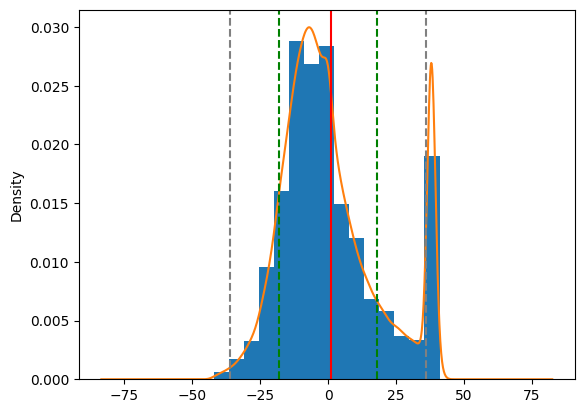

In [19]:
media_ArrDelay = np.mean(df["ArrDelay"].values) 
std_ArrDelay = np.std(df["ArrDelay"].values)


df["ArrDelay"].plot(kind = "hist", density = True, bins=15) # change density to true, because KDE uses density
df["ArrDelay"].plot(kind = "kde")
plt.axvline(x = media_ArrDelay, color = 'r', linestyle = '-', label = "Media")
plt.axvline(x = std_ArrDelay, color = 'g', linestyle = '--', label = "std")
plt.axvline(x = -1*std_ArrDelay, color = 'g', linestyle = '--')
plt.axvline(x = 2*std_ArrDelay, color = 'gray', linestyle = '--', label = "2*std")
plt.axvline(x = -2*std_ArrDelay, color = 'gray', linestyle = '--')

In [20]:
# Determinar la distribucion de la columna ArrDelay
# Initialize distfit
dist = distfit()

# Determine best-fitting probability distribution for data
dist.fit_transform(df["ArrDelay"].values)

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.0398085] [loc=1.111 scale=18.058]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.0532163] [loc=-42.000 scale=43.111]
[distfit] >INFO> [pareto    ] [0.11 sec] [RSS: 0.0532163] [loc=-8589934634.000 scale=8589934592.000]
[distfit] >INFO> [dweibull  ] [2.56 sec] [RSS: 0.0397363] [loc=1.435 scale=15.338]
[distfit] >INFO> [t         ] [11.7 sec] [RSS: 0.0398083] [loc=1.111 scale=18.058]
[distfit] >INFO> [genextreme] [11.6 sec] [RSS: 0.0370481] [loc=-6.838 scale=14.906]
[distfit] >INFO> [gamma     ] [1.03 sec] [RSS: 0.0374524] [loc=-48.726 scale=6.433]
[distfit] >INFO> [lognorm   ] [4.18 sec] [RSS: 0.037168] [loc=-62.492 scale=61.177]
[distfit] >INFO> [beta      ] [7.65 sec] [RSS: 0.0374434] [loc=-48.038 scale=10118914.527]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.0455636] [loc=-42.000 scale=83.000]
[distfit] >INFO> [loggamma  ] [1.22 sec] [RSS: 0.0399498] [loc=-4247.851 scale=606.687]
[

{'model': {'name': 'genextreme',
  'score': 0.03704812879616959,
  'loc': -6.837567310934632,
  'scale': 14.906359185821536,
  'arg': (0.05297241484697815,),
  'params': (0.05297241484697815, -6.837567310934632, 14.906359185821536),
  'model': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7fb038ce28e0>,
  'bootstrap_score': 0,
  'bootstrap_pass': None,
  'color': '#e41a1c',
  'CII_min_alpha': -23.67728439905292,
  'CII_max_alpha': 34.129874859612684},
 'summary':           name     score           loc              scale  \
 0   genextreme  0.037048     -6.837567          14.906359   
 1      lognorm  0.037168    -62.491783           61.17661   
 2         beta  0.037443    -48.037747    10118914.526887   
 3        gamma  0.037452    -48.726091           6.432594   
 4     dweibull  0.039736      1.435281          15.337827   
 5            t  0.039808      1.110553          18.057528   
 6         norm  0.039808      1.110936           18.05766   
 7     loggamma   0.03

[distfit] >INFO> Create pdf plot for the parametric method.
[distfit] >INFO> Estimated distribution: Genextreme(loc:-6.837567, scale:14.906359)
La distribución más adecuada para 'ArrDelay' es:  genextreme
Parametros: (0.05297241484697815, -6.837567310934632, 14.906359185821536)
Score del modelo:  0.03704812879616959


(<Figure size 2000x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '\ngenextreme(c=0.0529724, loc=-6.83757, scale=14.9064)'}, xlabel='Values', ylabel='Frequency'>)

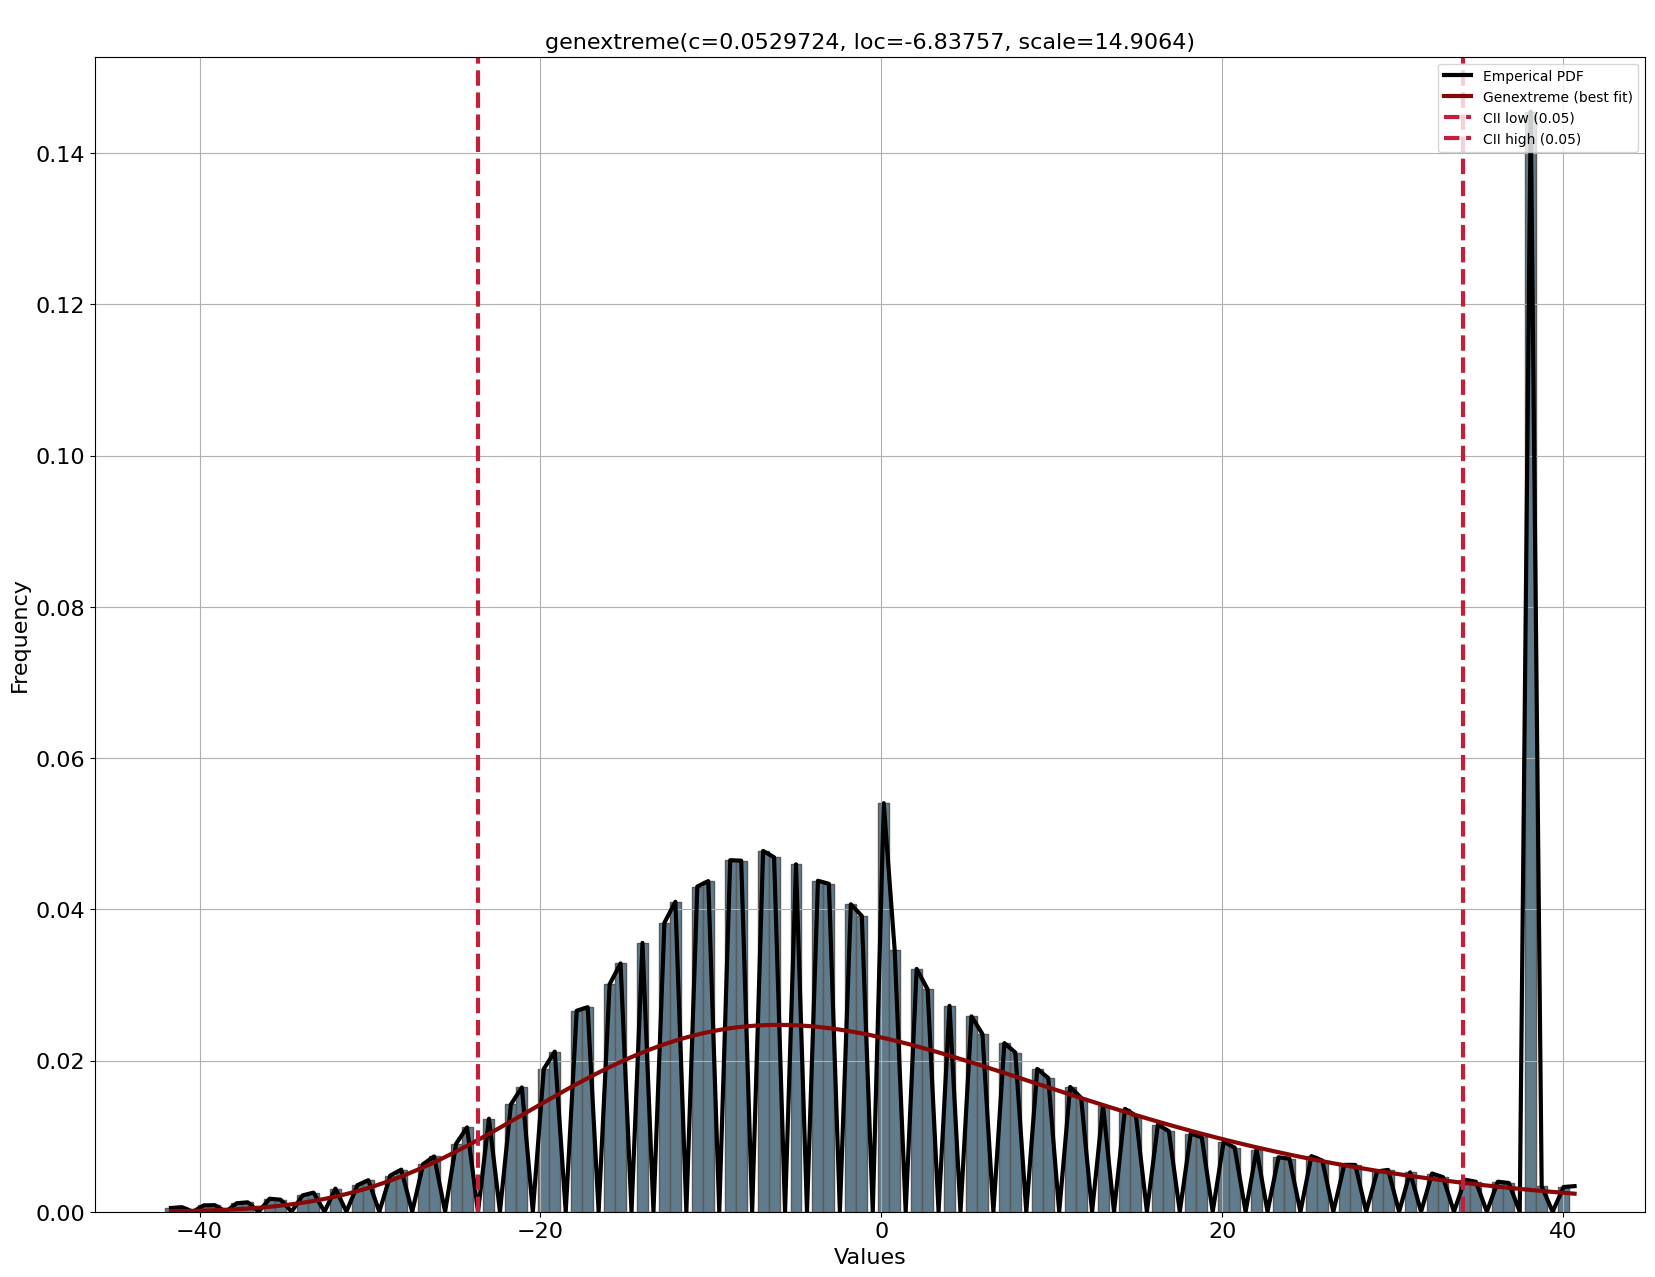

In [21]:
print("La distribución más adecuada para 'ArrDelay' es: ", dist.model['name'])
print("Parametros:", dist.model['params'])
print("Score del modelo: ", dist.model['score'])

dist.plot()

#### Utiliza estadísticas, funciones de agregación y visualización para responder a las siguientes preguntas.

##### ¿Cuáles son los promedios (mean) de salida y llegada?

Las columnas (númericas) relacionadas directamente con la salida de vuelos son: 
- **CRSDepTime**: La hora de salida programada
- **DepDelay**: El número de minutos que se retrasó la salida (los vuelos que salieron antes de lo previsto tienen un valor negativo)
- **Mes**: El mes del vuelo
- **DayofMonth** (día del mes): El día del mes en el que salió el vuelo
- **Día de la semana**: El día de la semana en que salió el vuelo - del 1 (lunes) al 7 (domingo)

Las columnas (númericas) relacionadas directamente con la llegada de vuelos son: 
- **CRSArrTime**: La hora de llegada programada
- **ArrDelay**: El número de minutos que se retrasó la llegada

In [22]:
# Columnas de salida
columnasSalida = df.loc[:, ['Month', 'DayofMonth','DayOfWeek','OriginAirportID', 'CRSDepTime', 'DepDelay']]
statistics = columnasSalida.describe()


print(f"Media del mes del vuelo - Month: {statistics.loc['mean']['Month']}")
print(f"Media del dia del mes de los vuelos - DayofMonth: {statistics.loc['mean']['DayofMonth']}")
print(f"Media del dia de la semana de los vuelos - DayOfWeek: {statistics.loc['mean']['DayOfWeek']}")
print(f"Media del ID del aeropuerto de salida - OriginAirportID: {statistics.loc['mean']['OriginAirportID']}")
print(f"Media de la hora de salida - 'CRSDepTime': {statistics.loc['mean']['CRSDepTime']}")
print(f"Media de los minutos de retraso a la salida - 'DepDelay': {statistics.loc['mean']['DepDelay']}")
print("NOTA: La hora de salida está expresada en el rango de valores desde 0 hasta 2400")

Media del mes del vuelo - Month: 6.9785136427153045
Media del dia del mes de los vuelos - DayofMonth: 15.814775318084871
Media del dia de la semana de los vuelos - DayOfWeek: 3.899316025593881
Media del ID del aeropuerto de salida - OriginAirportID: 12744.899584467163
Media de la hora de salida - 'CRSDepTime': 1325.4987129513863
Media de los minutos de retraso a la salida - 'DepDelay': 5.030885489446201
NOTA: La hora de salida está expresada en el rango de valores desde 0 hasta 2400


In [23]:
# Consultas específicas de la media de los dias en funcion por mes
diaSemanaSalidaPromedio = df.groupby('Month')['DayOfWeek'].mean()
diaMesSalidaPromedio = df.groupby('Month')['DayofMonth'].mean()
horaSalidaPromedio = df.groupby('Month')['CRSDepTime'].mean()
retrasoSalidaPromedio = df.groupby('Month')['DepDelay'].mean()

print("Media del dia de la semana en que se realizan los vuelos por mes: ")
print(diaSemanaSalidaPromedio)
print("\nMedia del dia del mes en que se realizan los vuelos por mes: ")
print(diaMesSalidaPromedio)
print("\nMedia de la hora de salida en que se realizan los vuelos por mes: ")
print(horaSalidaPromedio)
print("\nMedia de los minutos de retraso en los vuelos por mes: ")
print(retrasoSalidaPromedio)

Media del dia de la semana en que se realizan los vuelos por mes: 
Month
4     3.756820
5     3.920081
6     4.094827
7     3.756298
8     4.031130
9     3.909176
10    3.825436
Name: DayOfWeek, dtype: float64

Media del dia del mes en que se realizan los vuelos por mes: 
Month
4     15.461432
5     15.972756
6     15.636831
7     16.197924
8     15.764570
9     15.598862
10    16.037787
Name: DayofMonth, dtype: float64

Media de la hora de salida en que se realizan los vuelos por mes: 
Month
4     1326.558015
5     1324.236519
6     1331.336566
7     1331.763030
8     1328.240059
9     1317.231175
10    1317.984371
Name: CRSDepTime, dtype: float64

Media de los minutos de retraso en los vuelos por mes: 
Month
4     4.853089
5     4.611142
6     7.561733
7     6.704693
8     5.140062
9     2.901552
10    3.148079
Name: DepDelay, dtype: float64


In [24]:
# Columnas de llegada
columnasSalida = df.loc[:, ['CRSArrTime', 'ArrDelay']]
statistics = columnasSalida.describe()

print(f"Media de la hora de llegada - 'CRSArrTime': {statistics.loc['mean']['CRSArrTime']}")
print(f"Media de los minutos de retraso respecto a la hora de llegada original - 'ArrDelay': {statistics.loc['mean']['ArrDelay']}")
print("NOTA: La hora de llegada está expresada en el rango de valores desde 0 hasta 2400")

Media de la hora de llegada - 'CRSArrTime': 1505.477818636464
Media de los minutos de retraso respecto a la hora de llegada original - 'ArrDelay': 1.1109362359343973
NOTA: La hora de llegada está expresada en el rango de valores desde 0 hasta 2400


In [25]:
# Consultas específicas de la media de los días en funcion por mes
arrivehourmean = df.groupby('Month')['CRSArrTime'].mean()
delayMinsMean = df.groupby('Month')['ArrDelay'].mean()

arriveHourWeekMean = df.groupby('DayOfWeek')['CRSArrTime'].mean()
delayMinsWeekMean = df.groupby('DayOfWeek')['ArrDelay'].mean()


print("Media de la hora de llegada en que se realizan los vuelos por mes: ")
print(arrivehourmean)
print("\nMedia de los minutos de retraso en la llegada de los vuelos por mes: ")
print(delayMinsMean)
print("\nMedia de la hora de llegada en que se realizan los vuelos por dia de la semana: ")
print(arriveHourWeekMean)
print("\nMedia de los minutos de retraso en la llegada de los vuelos por dia de la semana: ")
print(delayMinsWeekMean)

Media de la hora de llegada en que se realizan los vuelos por mes: 
Month
4     1507.408833
5     1505.439059
6     1502.379920
7     1497.086244
8     1500.550412
9     1512.634026
10    1514.127573
Name: CRSArrTime, dtype: float64

Media de los minutos de retraso en la llegada de los vuelos por mes: 
Month
4     1.025164
5     0.453727
6     4.360012
7     3.541776
8     1.132980
9    -1.727833
10   -1.406162
Name: ArrDelay, dtype: float64

Media de la hora de llegada en que se realizan los vuelos por dia de la semana: 
DayOfWeek
1    1510.022995
2    1496.076339
3    1507.861340
4    1502.969402
5    1504.038362
6    1477.768109
7    1535.483280
Name: CRSArrTime, dtype: float64

Media de los minutos de retraso en la llegada de los vuelos por dia de la semana: 
DayOfWeek
1    1.327650
2   -0.215123
3    1.277394
4    3.537854
5    2.481820
6   -1.485995
7    0.217773
Name: ArrDelay, dtype: float64


##### ¿Cómo se comparan las compañías en cuanto a retrasos en las llegadas?

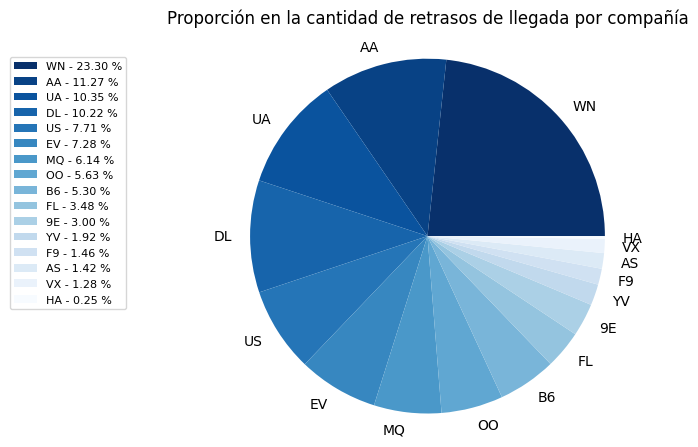

In [26]:
delayarrive = df[df['ArrDel15'] == 1]
count_delay_companies = delayarrive.groupby('Carrier')['Carrier'].count().sort_values(ascending = False)
companies = list(count_delay_companies.index)
count_delay = np.array(count_delay_companies)
porcent = 100. * count_delay / count_delay.sum()

colors_data = cm.get_cmap("Blues")(np.linspace(1.0, 0, len(count_delay)))

patches, texts = plt.pie(count_delay, colors=colors_data, labels=companies, startangle=0, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(companies, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy = zip(*sorted(zip(patches, labels, count_delay),
                                          key=lambda x: x[2],
                                          reverse=True))
plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.3, 1),
           fontsize=8)
plt.title('Proporción en la cantidad de retrasos de llegada por compañía', pad = 20.0)
plt.show()

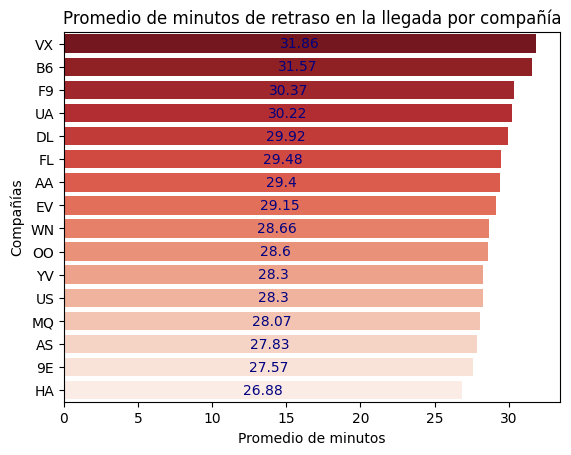

In [27]:
statistics = (delayarrive.groupby('Carrier')['ArrDelay'].describe()).sort_values(by = ['mean'], ascending = False)
companies = list(statistics.index)
mean_arrdelay_companies = np.ravel(statistics.loc[companies, ['mean']])
pal = sns.color_palette("Reds", len(mean_arrdelay_companies))
rank = mean_arrdelay_companies.argsort().argsort()
_ = sns.barplot(y = companies, x = mean_arrdelay_companies, palette=np.array(pal)[rank])

i = 0
for p in _.patches:
    _.annotate(round(mean_arrdelay_companies[i], 2),
                (p.get_x() + p.get_width() / 2, p.get_y() + p.get_height() / 2), ha='center', va='center', color='navy')
    i += 1

plt.xlabel("Promedio de minutos")
plt.ylabel("Compañías")
plt.title("Promedio de minutos de retraso en la llegada por compañía")
plt.show()

La compañía asociada con la clave WN es la que presenta la mayor proporción respecto a todos los patrones que presentaron retrasos. De tal manera que 1 de cada 5 retrasos son de la compañía WN. Por otra parte, al comparar las compañías con base en la media de minutos de retraso se tiene que WN no es la que posee el mayor promedio sino la compañía VX. Cabe mencionar que si bien WN es la compañía que se tiende a retrasar con mayor frecuencia, es la #9 en el Top de promedio de minutos de retraso, mientras que VX es la segunda compañía que presenta menor cantidad de retrasos pero cuando se retrasa es la que se retrasa con la mayor cantidad de minutos respecto al resto de compañías. 

##### ¿Hay días de la semana más propensos a las llegadas que otros?

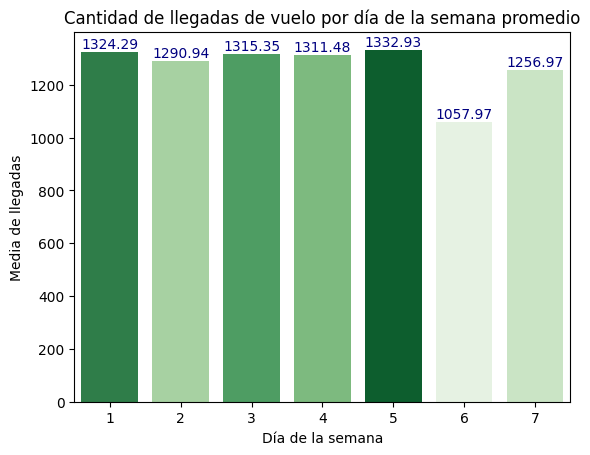

In [28]:
# Se realiza conteo de retrasos por cada día
grouped_df = df.groupby(['Year', 'Month', 'DayofMonth', 'DayOfWeek'])
count_day_of_week = pd.DataFrame(grouped_df.size().reset_index(name = "Count"))[['DayOfWeek', 'Count']]
#print(count_day_of_week)
# Se realiza el promedio de los conteos de retrasos por cada día
grouped_count_day_of_week = count_day_of_week.groupby('DayOfWeek')['Count'].mean()
days_of_week = list(grouped_count_day_of_week.index)
mean_count_day_of_week = np.ravel(grouped_count_day_of_week.loc[days_of_week])
pal = sns.color_palette("Greens", len(mean_count_day_of_week))
rank = mean_count_day_of_week.argsort().argsort()
_ = sns.barplot(x = days_of_week, y = mean_count_day_of_week, palette=np.array(pal)[rank])

i = 0
for p in _.patches:
    _.annotate(round(mean_count_day_of_week[i], 2),
                (p.get_x() + p.get_width() / 2, p.get_height() + 30), ha='center', va='center', color='navy')
    i += 1
plt.title("Cantidad de llegadas de vuelo por día de la semana promedio")
plt.xlabel("Día de la semana")
plt.ylabel("Media de llegadas")
plt.show()

Tomando en cuenta que la clase '1' indica lunes y '7' el domingo, tenemos que el viernes es el día con la mayor cantidad de llegadas en promedio, seguido por el lunes y miércoles. Por lo que, en efecto si existen días más propensos a las llegadas, y los mayores contrastes se presentan al comparar los días entre semana y los fines de semana, aunque de lunes a viernes las variaciones son casi mínimas en cuanto al promedio de llegadas.

##### ¿Cuál es el aeropuerto de salida con mayor retraso medio?

In [29]:
#Dataset de cuando la salida es con retraso
citys_df = df[df["DepDel15"] == 1]

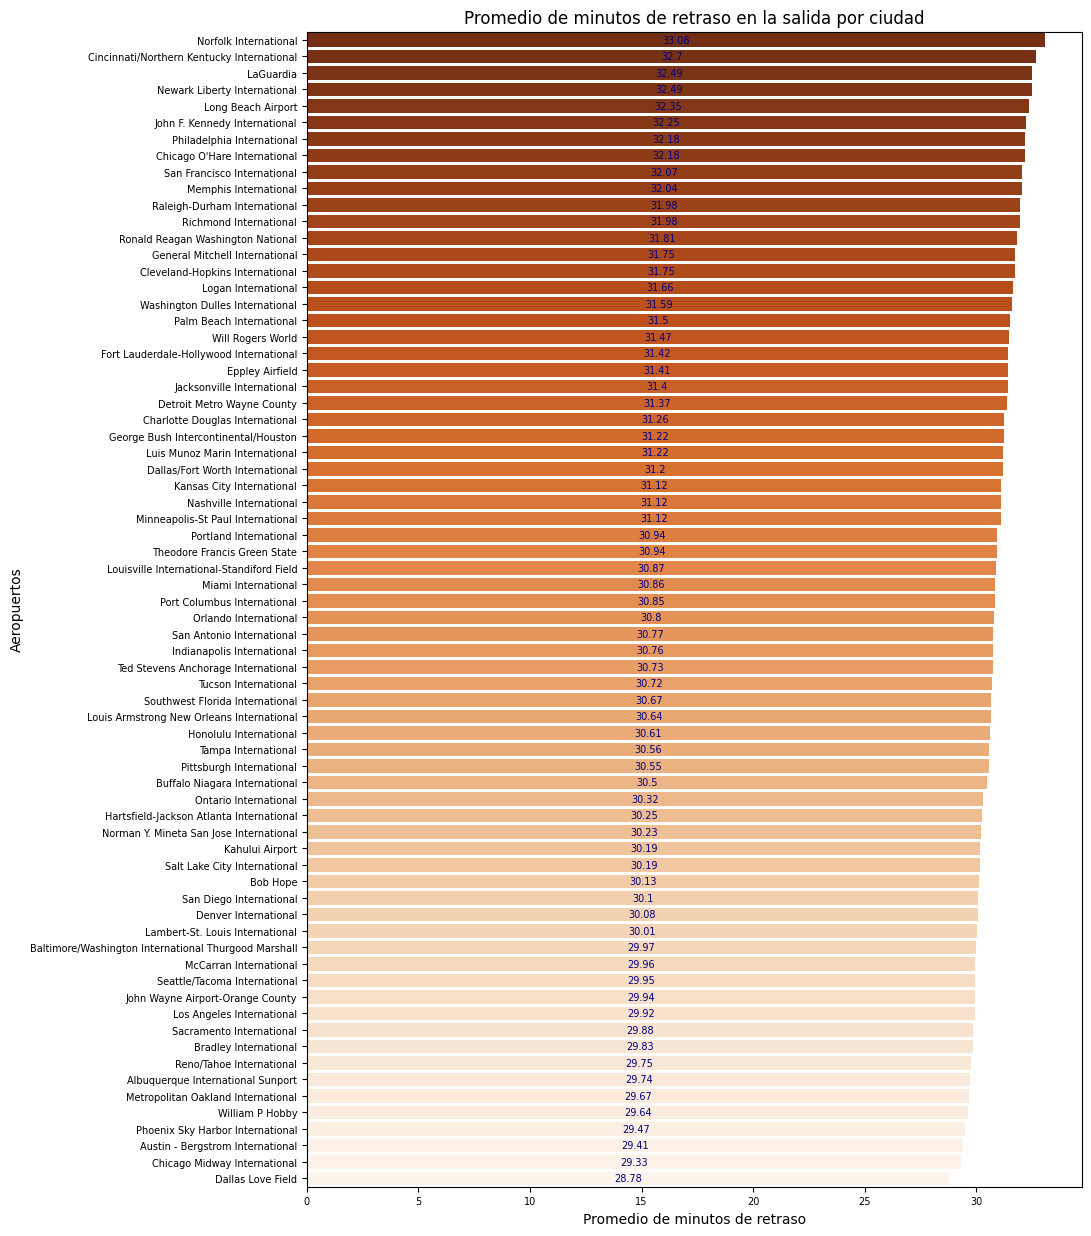

In [30]:
statistics = (citys_df.groupby('OriginAirportName')['DepDelay'].describe()).sort_values(by = ['mean'], ascending = False)
#print(statistics)
companies = list(statistics.index)
mean_arrdelay_companies = np.ravel(statistics.loc[companies, ['mean']])
pal = sns.color_palette("Oranges", len(mean_arrdelay_companies))
rank = mean_arrdelay_companies.argsort().argsort()
_ = sns.barplot(y = companies, x = mean_arrdelay_companies, palette=np.array(pal)[rank])
_.tick_params(labelsize = 7)

i = 0
for p in _.patches:
    _.annotate(round(mean_arrdelay_companies[i], 2),
                (p.get_x() + p.get_width() / 2, p.get_y() + p.get_height() / 2), ha='center', va='center', color='navy', size=7)
    i += 1

plt.xlabel("Promedio de minutos de retraso")
plt.ylabel("Aeropuertos")
plt.title("Promedio de minutos de retraso en la salida por ciudad")
plt.gcf().set_size_inches(10,15)
plt.show()

Por lo tanto, el aeropuerto de salida con mayor retraso medio es el de Norfolk International.

##### ¿Las salidas tardías suelen provocar mayores retrasos en las llegadas que las salidas puntuales?

In [31]:
delayDel_df = df[df["DepDel15"] == 1]
punctDel_df = df[df["DepDel15"] == 0]
arrDelay = delayDel_df["ArrDelay"].mean() #La media de retraso en la llegada cuando la salida es tardia
arrPucnt = punctDel_df["ArrDelay"].mean() #La media de retraso en la llegada cuando la salida es puntual

In [32]:
arrDelay

27.331467833989027

In [33]:
arrPucnt

-5.4070266621977146

Podemos ver que efectivamente cuando la salida es tardía provoca mayores retrasos que cuando la salida es puntual.

##### ¿Qué ruta (del aeropuerto de origen al aeropuerto de destino) tiene más llegadas con retraso?

In [34]:
# Registros con retraso
delayarrive = df[df['ArrDel15'] == 1]
# Rutas
# Agrupamos por ruta
routesdelay = delayarrive.groupby(['OriginAirportName', 'DestAirportName'])['ArrDel15'].count().sort_values(ascending = False)
routesdelay.head(10)

OriginAirportName                         DestAirportName                         
Los Angeles International                 San Francisco International                 324
San Francisco International               Los Angeles International                   286
McCarran International                    San Francisco International                 198
LaGuardia                                 Hartsfield-Jackson Atlanta International    196
Hartsfield-Jackson Atlanta International  LaGuardia                                   174
Chicago O'Hare International              LaGuardia                                   161
                                          Hartsfield-Jackson Atlanta International    158
McCarran International                    Los Angeles International                   150
John F. Kennedy International             Los Angeles International                   148
Chicago O'Hare International              Newark Liberty International                147
Name: ArrDel15, d

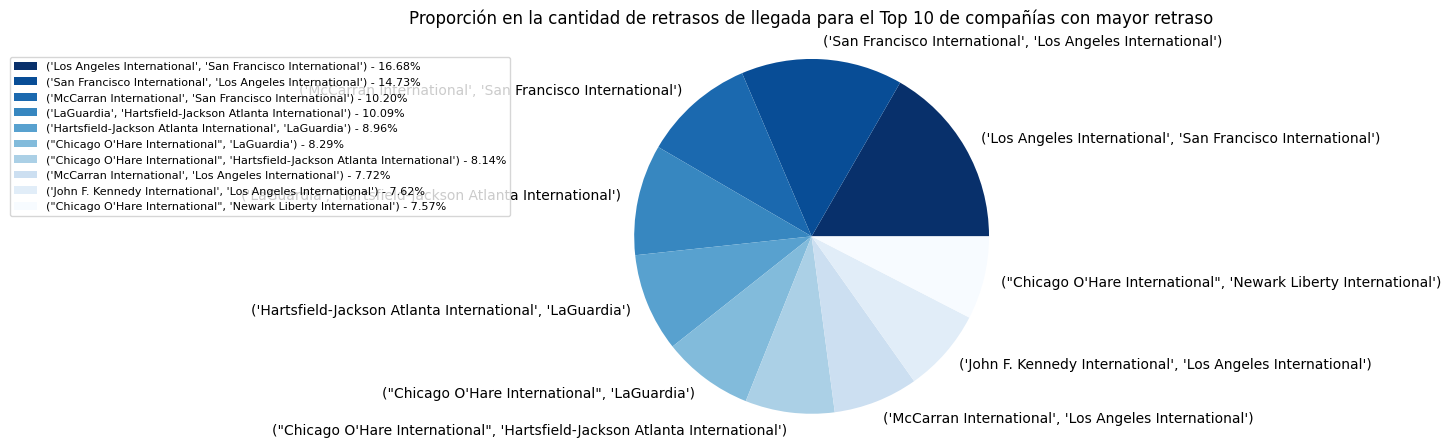

In [35]:
# Obtenemos los primeros 10 registros...
first_routesdelay = routesdelay[:10]
# Obtenemos los nombres de las rutas
routes = first_routesdelay.index
str_routes = [str(i) for i in routes]

colors_data = cm.get_cmap("Blues")(np.linspace(1.0, 0, len(first_routesdelay)))

patches, texts = plt.pie(first_routesdelay, colors=colors_data, labels=str_routes, startangle=0, radius=1.2)
labels = ['{0} - {1:1.2f}%'.format(i,j*100/sum(first_routesdelay)) for i,j in zip(str_routes, first_routesdelay)]

sort_legend = True
if sort_legend:
    patches, labels, dummy = zip(*sorted(zip(patches, labels, count_delay),
                                          key=lambda x: x[2],
                                          reverse=True))
plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.3, 1),
           fontsize=8)
plt.title('Proporción en la cantidad de retrasos de llegada para el Top 10 de compañías con mayor retraso', pad = 20.0)
plt.show()

Los Angeles - San Francisco es la ruta con la mayor cantidad de retrasos.

##### ¿Qué ruta tiene el mayor retraso medio de llegada?

In [36]:
# Rutas
# Agrupamos por ruta
routesminutesdelay = delayarrive.groupby(['OriginAirportName', 'DestAirportName'])['ArrDelay'].mean().sort_values(ascending = False)
routesminutesdelay.head(10)

OriginAirportName                   DestAirportName                           
Southwest Florida International     General Mitchell International                41.000000
Jacksonville International          Cincinnati/Northern Kentucky International    41.000000
Port Columbus International         Cleveland-Hopkins International               41.000000
Bradley International               Raleigh-Durham International                  41.000000
Austin - Bergstrom International    Ronald Reagan Washington National             39.500000
Will Rogers World                   San Francisco International                   39.000000
Metropolitan Oakland International  Kansas City International                     39.000000
Buffalo Niagara International       Minneapolis-St Paul International             39.000000
Cleveland-Hopkins International     Port Columbus International                   39.000000
Long Beach Airport                  Logan International                           38.666667
N

Se agruparon los datos obteniendo la media de retraso de llegada, mostrando las 10 rutas ordenadas de mayor a menor retraso. Por lo que la ruta con mayor retraso medio en la llegada es de Southwest Florida a General Mitchell International.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=422b1480-f644-445a-b51d-ec658329e66b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>